# Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data/BA_Reviews_processed.csv")

## Biểu đồ x

+ Tiêu đề: Tổng điểm đánh giá qua từng năm.
+ Loại biểu đồ: Line chart
+ Lý do chọn : Line chart là một cách hiệu quả để thể hiện các xu hướng tăng giảm hoặc sự biến động của dữ liệu qua thời gian. Do đó ta dùng line chart để xem xét sự thay đổi điểm đánh giá chuyến bay qua từng năm.

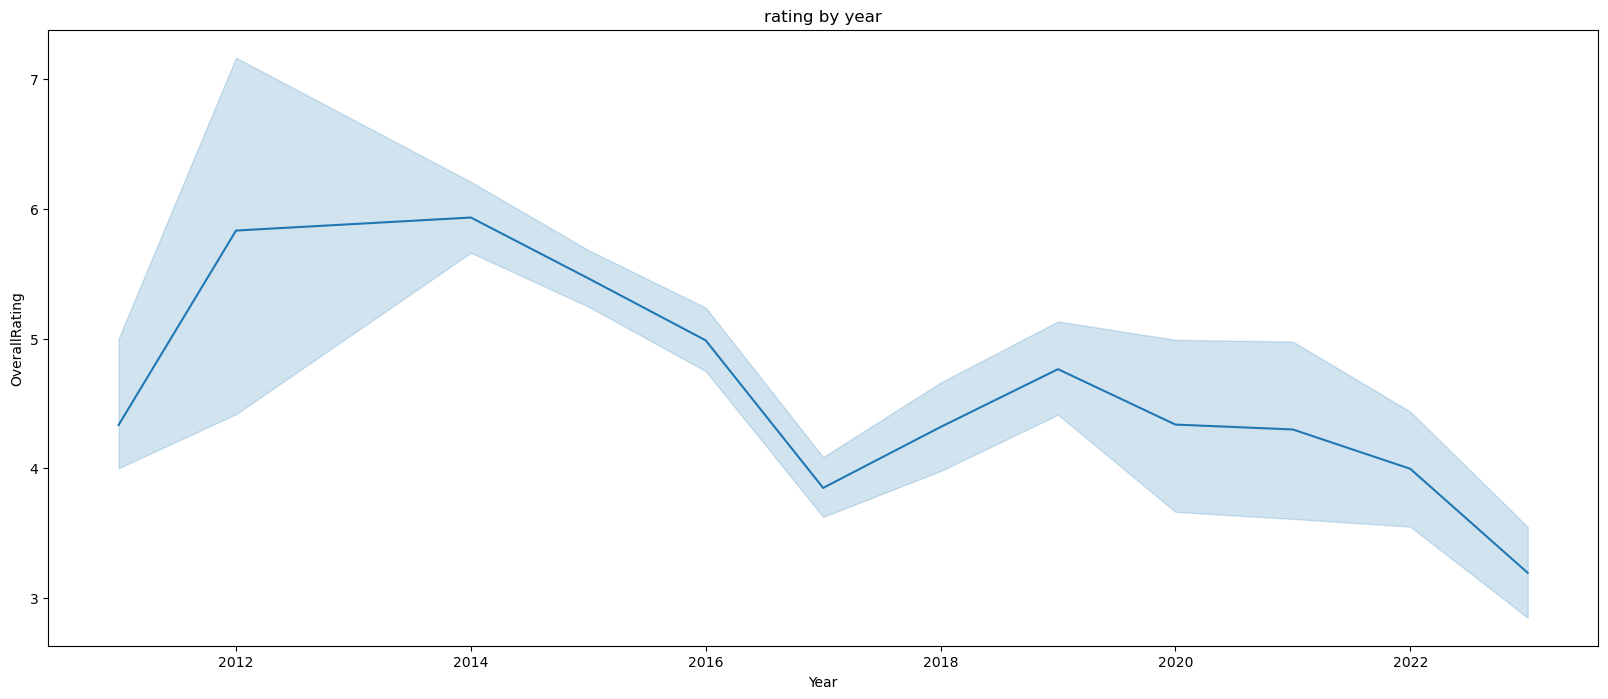

In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year']=(df['Datetime']).dt.year
plt.subplots(figsize=(20,8))
sns.lineplot(x='Year', y='OverallRating', data=df).set_title('rating by year')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.show();

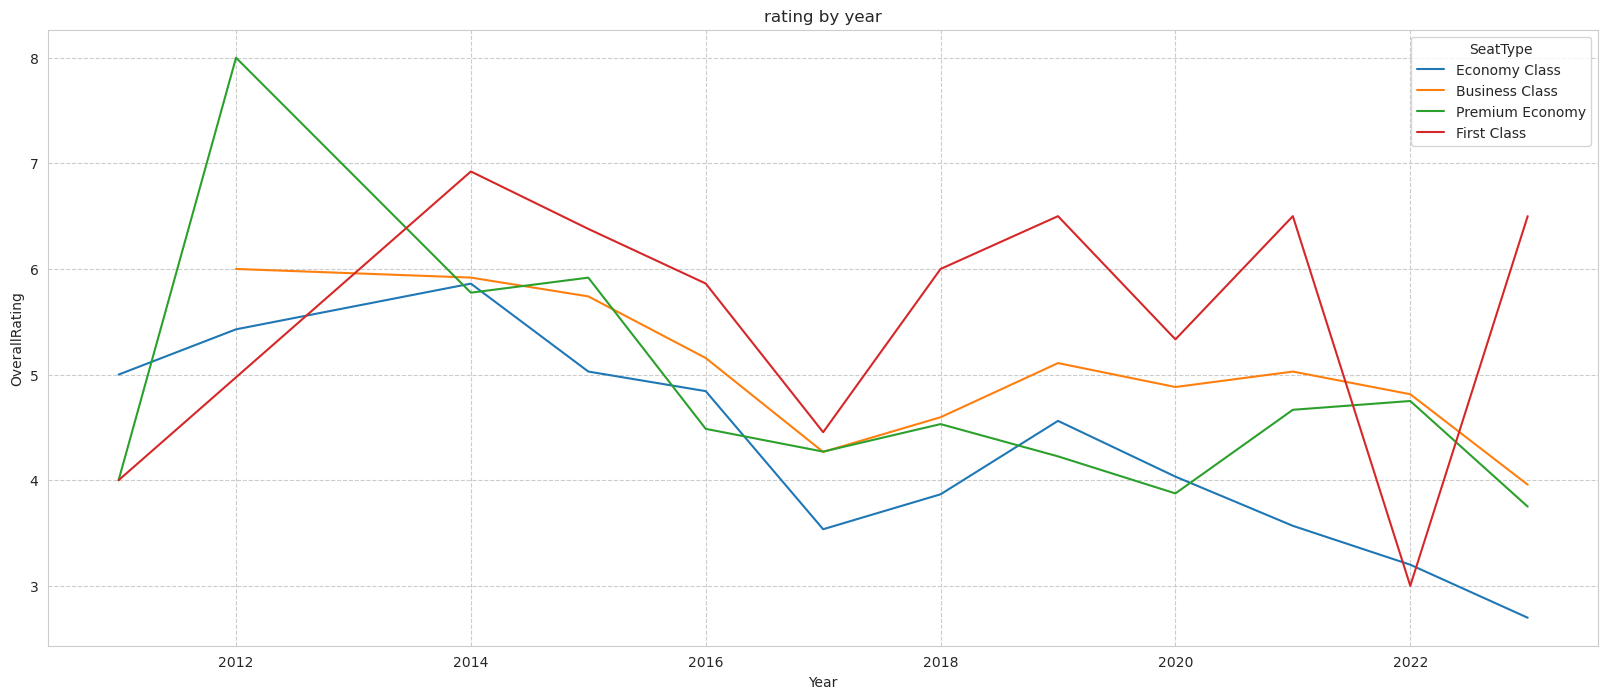

In [4]:
plt.subplots(figsize=(20,8))
sns.lineplot(x='Year', y='OverallRating', data=df, hue='SeatType', errorbar=None).set_title('rating by year')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.show();

## Biểu đồ x

+ Tiêu đề: Tiêu chí nào ảnh hưởng đến Overall Rating nhiều nhất
+ Loại biểu đồ: Bar chart


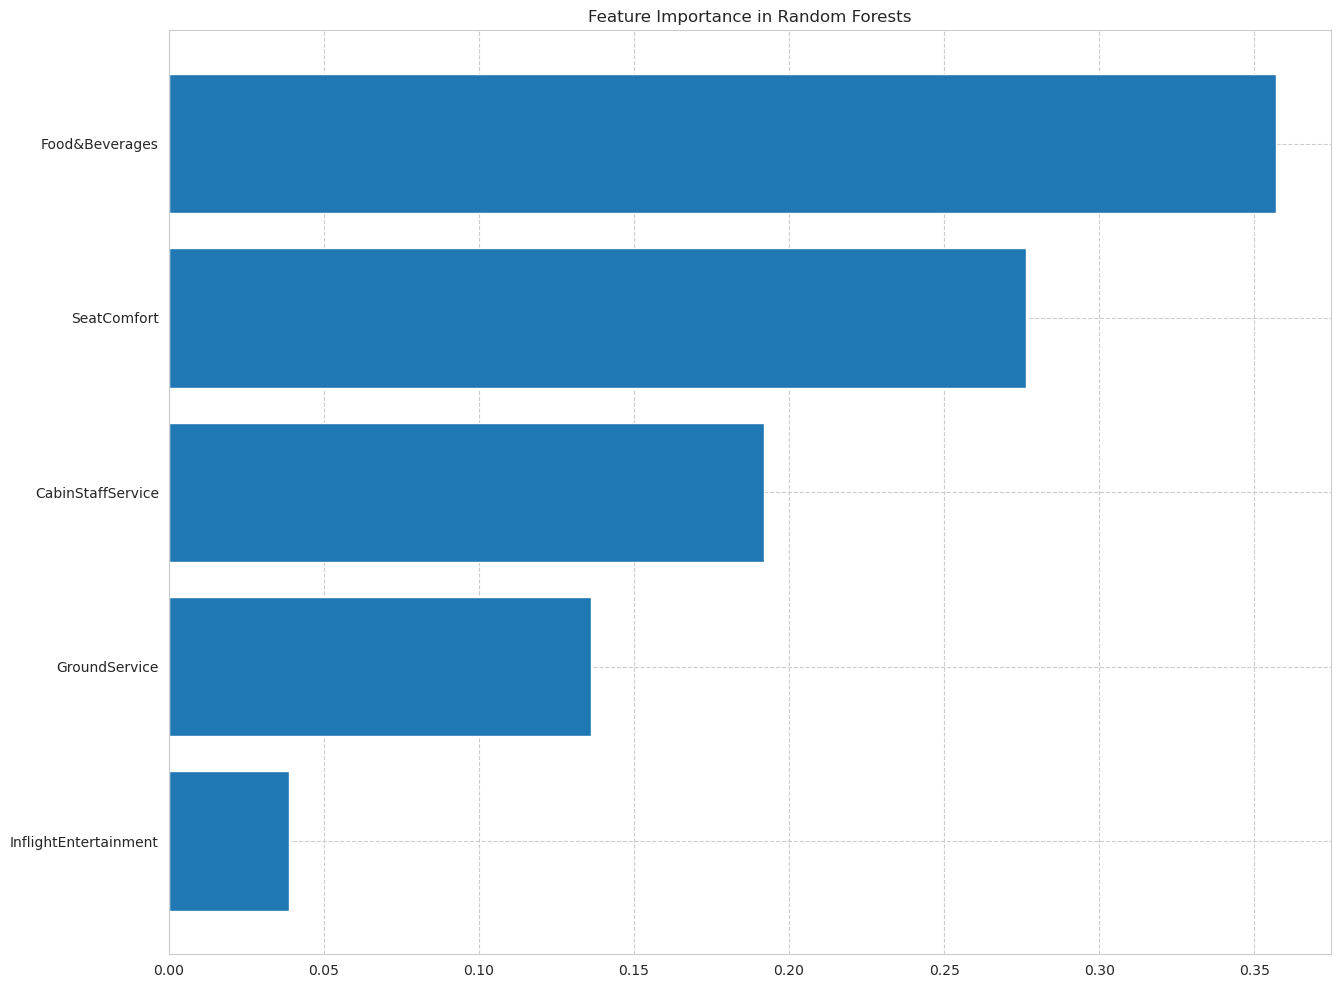

In [5]:
from sklearn.ensemble import RandomForestRegressor

X = df[['SeatComfort', 'CabinStaffService', 'GroundService', 'Food&Beverages', 'InflightEntertainment']]
y = df[['OverallRating']]

model = RandomForestRegressor()
model.fit(X, y)

f, ax=plt.subplots(figsize=(15,12))
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax)
ax.set_title('Feature Importance in Random Forests');

## Biểu đồ x:

Try using dimensionality reduction...

In [6]:
X_tsne = df[['SeatComfort', 'CabinStaffService', 'GroundService', 'Food&Beverages', 'InflightEntertainment', 'OverallRating']]
X_tsne = X_tsne.fillna(X_tsne.median())
print(X_tsne)

      SeatComfort  CabinStaffService  GroundService  Food&Beverages  \
0             1.0                1.0            1.0             3.0   
1             2.0                3.0            1.0             1.0   
2             3.0                3.0            4.0             4.0   
3             3.0                3.0            1.0             3.0   
4             1.0                1.0            1.0             1.0   
...           ...                ...            ...             ...   
3696          3.0                1.0            3.0             2.0   
3697          4.0                5.0            3.0             4.0   
3698          3.0                3.0            3.0             3.0   
3699          1.0                3.0            3.0             5.0   
3700          4.0                5.0            3.0             5.0   

      InflightEntertainment  OverallRating  
0                       3.0            1.0  
1                       2.0            3.0  
2           

In [7]:
X_tsne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SeatComfort            3701 non-null   float64
 1   CabinStaffService      3701 non-null   float64
 2   GroundService          3701 non-null   float64
 3   Food&Beverages         3701 non-null   float64
 4   InflightEntertainment  3701 non-null   float64
 5   OverallRating          3701 non-null   float64
dtypes: float64(6)
memory usage: 173.6 KB


In [8]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tsne)
tsne.kl_divergence_

1.2195050716400146

In [9]:
print(X_tsne)

[[-56.68128     30.395588  ]
 [-32.78206      5.3037558 ]
 [ 38.24188     -0.95868737]
 ...
 [  1.181398    -6.125781  ]
 [ -3.2993062   10.0364485 ]
 [ -0.94981736  28.955313  ]]


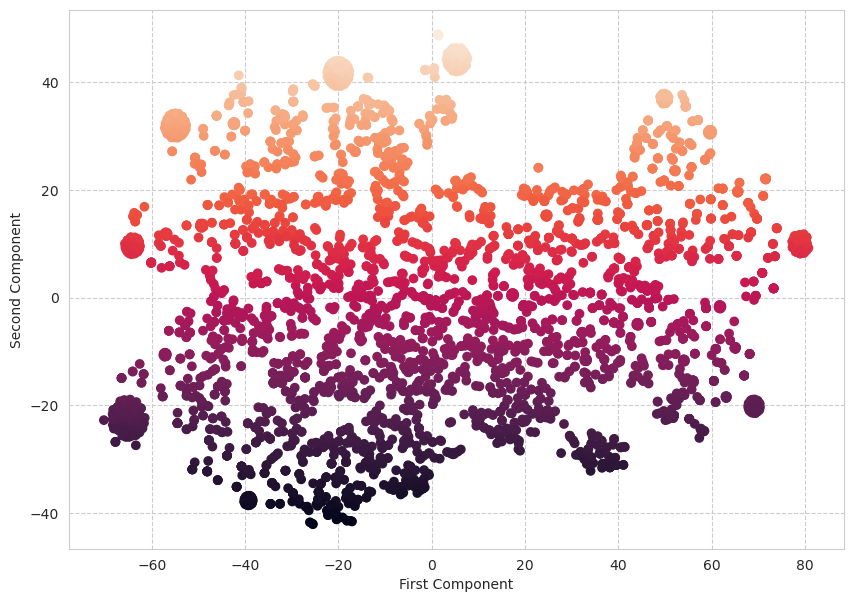

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X_tsne[:,0], X_tsne[:,1], c=X_tsne[:,1])
ax.set(xlabel='First Component',
       ylabel='Second Component');

## Biểu đồ x

+ Tiêu đề: Những đánh giá thể hiện qua đám mây từ
+ Loại biểu đồ: WordCloud
+ Lý do: Một đám mây từ trong Python sẽ biểu thị trực quan cho dữ liệu văn bản. Còn được gọi là đám mây thẻ, nó sử dụng các cỡ chữ và màu sắc khác nhau để làm nổi bật tầm quan trọng của mỗi từ. Bằng cách này sẽ làm nổi trội tên các lĩnh vực phục vụ (Review Header) để lại ấn tượng cho người xem.

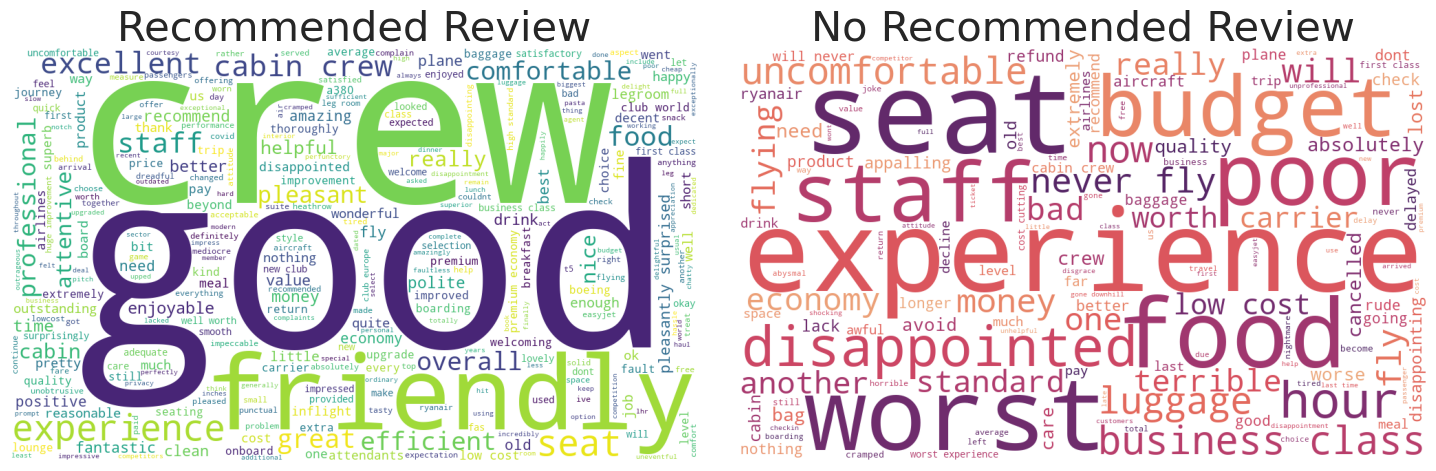

In [11]:
from wordcloud import WordCloud

def create_cloud(text):
    stopwords = ['British', 'british', 'Airways', 'airways', 'airline', 'customer', 'review',
                 'flights', 'flight', 'Service', 'service', 'BA', 'ba']
    comment_words = ' '
    
    for val in text:
        val = str(val)
        tokens = val.split(" ")
        
        for i in range(len(tokens)):
            tokens[i] = ''.join(filter(str.isalnum, tokens[i])).lower()
        
        for words in tokens:
            if words not in stopwords:
                comment_words = comment_words + words + ' '

    return comment_words
        
recommend = df[df['Recommended']=='yes']['ReviewHeader'].values
no_recommend = df[df['Recommended']=='no']['ReviewHeader'].values

wordcloud_recommend = WordCloud(background_color="white", max_words=300, min_font_size = 10, 
                                width=1000, height=600).generate(create_cloud(recommend))
wordcloud_norecommend = WordCloud(background_color="white", max_words=300, colormap='flare', min_font_size = 10, 
                                  width=1000, height=600).generate(create_cloud(no_recommend))
                                             
figure, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(wordcloud_recommend)
axes[0].axis('off')
axes[0].set_title('Recommended Review', fontsize=30)
axes[1].imshow(wordcloud_norecommend)
axes[1].axis('off')
axes[1].set_title('No Recommended Review', fontsize=30)
plt.tight_layout(pad=3)
plt.show()